In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [2]:
label = LabelEncoder()
df = pd.read_excel("data/Raisin.xlsx");
df['Class'] = label.fit_transform(df['Class']);

df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [3]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'raisin type')

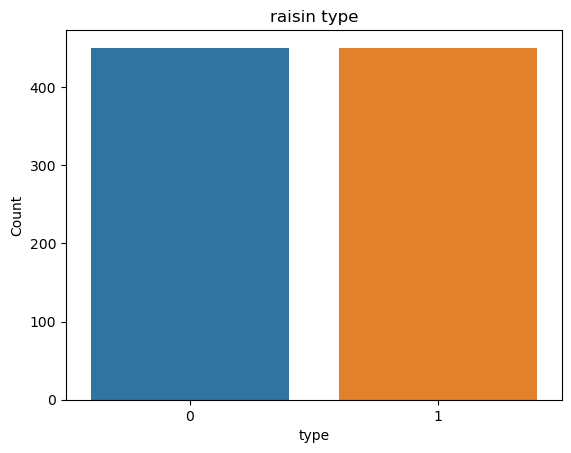

In [4]:
sns.countplot(data = df, x="Class")
plt.xlabel("type")
plt.ylabel("Count")
plt.title("raisin type")

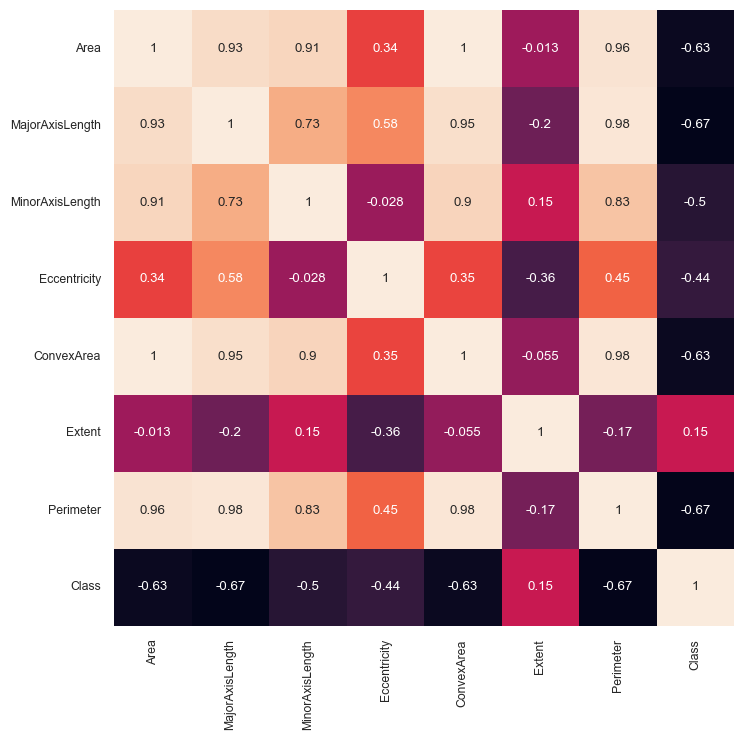

In [5]:
df_corr = df.corr()

plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [6]:
X = df[['Area','MajorAxisLength','ConvexArea','Perimeter']].values
y = df.iloc[:,-1].values

In [7]:
X

array([[ 87524.       ,    442.2460114,  90546.       ,   1184.04     ],
       [ 75166.       ,    406.690687 ,  78789.       ,   1121.786    ],
       [ 90856.       ,    442.2670483,  93717.       ,   1208.575    ],
       ...,
       [ 99657.       ,    431.7069809, 106264.       ,   1292.828    ],
       [ 93523.       ,    476.3440939,  97653.       ,   1258.548    ],
       [ 85609.       ,    512.0817743,  89197.       ,   1272.862    ]])

In [8]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [10]:
import numpy as np

mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)


X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [11]:
X_train

array([[-0.6548812 , -0.78812672, -0.65224802, -0.71404437],
       [-1.00293785, -1.35563187, -1.00956114, -1.13149817],
       [-0.93428768, -0.98454723, -0.92403154, -0.99769926],
       ...,
       [-0.10971045,  0.10379878, -0.04391002,  0.28777656],
       [ 1.34597299,  0.82730363,  1.33404467,  1.16198015],
       [ 0.02459276,  0.21301716,  0.05788717,  0.18085058]])

In [12]:
from tensorflow.python.keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)

print('New y_train shape: ', y_train.shape)
print('New y_train shape: ', y_test.shape)

New y_train shape:  (720, 2)
New y_train shape:  (180, 2)


In [13]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(7,input_shape=(4,),activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.01),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_593"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2372 (Dense)          (None, 7)                 35        
                                                                 
 dense_2373 (Dense)          (None, 14)                112       
                                                                 
 dense_2374 (Dense)          (None, 13)                195       
                                                                 
 dense_2375 (Dense)          (None, 2)                 28        
                                                                 
Total params: 370 (1.45 KB)
Trainable params: 370 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/100
23/23 [==============================] - 3s 22ms/step - loss: 0.5299 - accuracy: 0.8375 - val_loss: 0.3454 - val_accuracy: 0.8778
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3622 - accuracy: 0.8597 - val_loss: 0.3365 - val_accuracy: 0.8889
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3444 - accuracy: 0.8569 - val_loss: 0.3331 - val_accuracy: 0.9000
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3396 - accuracy: 0.8583 - val_loss: 0.3194 - val_accuracy: 0.8944
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3360 - accuracy: 0.8611 - val_loss: 0.3103 - val_accuracy: 0.9056
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3519 - accuracy: 0.8569 - val_loss: 0.3243 - val_accuracy: 0.9056
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3461 - accuracy: 0.8542 - val_loss: 0.3083 - val_accuracy: 0.9000
Epoch 8/100

Epoch 59/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3014 - accuracy: 0.8708 - val_loss: 0.3030 - val_accuracy: 0.9000
Epoch 60/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.8708 - val_loss: 0.2681 - val_accuracy: 0.9000
Epoch 61/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2986 - accuracy: 0.8750 - val_loss: 0.2912 - val_accuracy: 0.9111
Epoch 62/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2989 - accuracy: 0.8792 - val_loss: 0.2853 - val_accuracy: 0.9056
Epoch 63/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3036 - accuracy: 0.8750 - val_loss: 0.2984 - val_accuracy: 0.9111
Epoch 64/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.8597 - val_loss: 0.2962 - val_accuracy: 0.9000
Epoch 65/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2989 - accuracy: 0.8722 - val_loss: 0.2873 - val_accuracy: 0.9056
Epoch 

In [148]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

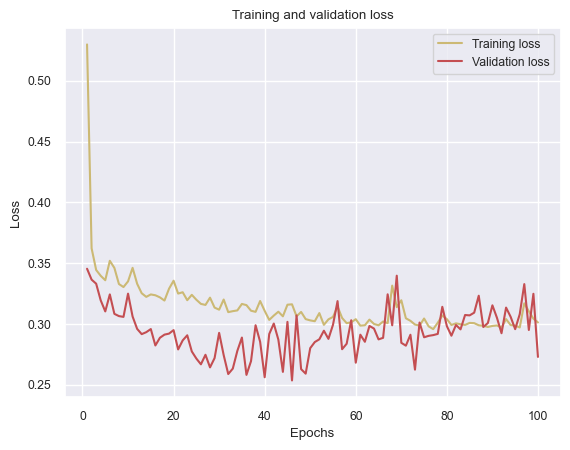

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

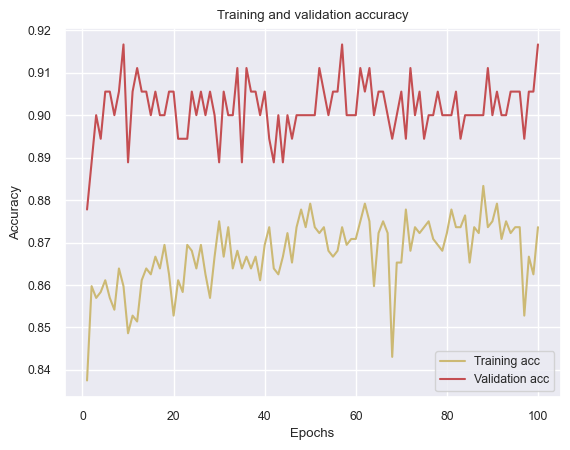

In [150]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [151]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        97
           1       0.89      0.94      0.91        83

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180

[[87 10]
 [ 5 78]]


In [20]:
# Note. method for finding opt parameter using optuna
# skopt has a problem about numpy integer transformation (https://github.com/scikit-optimize/scikit-optimize/issues/1171)
import optuna
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [135]:
def createModel(trial):
    units_layer1 = trial.suggest_int('units_layer1', 4, 16)
    units_layer2 = trial.suggest_int('units_layer2', 4, 16)
    units_layer3 = trial.suggest_int('units_layer3', 4, 16)

    model = Sequential()

    model.add(Dense(units_layer1,input_shape=(4,),activation='relu'))
    model.add(Dense(units_layer2,activation='relu'))
    model.add(Dense(units_layer3,activation='relu'))
    model.add(Dense(2,activation='sigmoid'))

    learning_rate = trial.suggest_categorical('learning_rate', [0.001,0.005,0.01, 0.02, 0.03])
    model.compile(Adam(learning_rate=learning_rate),'binary_crossentropy',metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=0)
    val_loss = history.history['val_loss'][-1]

    return val_loss

In [136]:
study = optuna.create_study(direction='minimize')
study.optimize(createModel, n_trials=500)

[I 2023-09-16 15:50:38,074] A new study created in memory with name: no-name-463d5d91-a96c-4224-9026-6e9733dd6130
[I 2023-09-16 15:50:51,131] Trial 0 finished with value: 0.25658947229385376 and parameters: {'units_layer1': 4, 'units_layer2': 6, 'units_layer3': 6, 'learning_rate': 0.02}. Best is trial 0 with value: 0.25658947229385376.
[I 2023-09-16 15:51:05,738] Trial 1 finished with value: 0.259679913520813 and parameters: {'units_layer1': 10, 'units_layer2': 16, 'units_layer3': 13, 'learning_rate': 0.01}. Best is trial 0 with value: 0.25658947229385376.
[I 2023-09-16 15:51:21,265] Trial 2 finished with value: 0.24650876224040985 and parameters: {'units_layer1': 12, 'units_layer2': 7, 'units_layer3': 11, 'learning_rate': 0.005}. Best is trial 2 with value: 0.24650876224040985.
[I 2023-09-16 15:51:34,390] Trial 3 finished with value: 0.2556849420070648 and parameters: {'units_layer1': 10, 'units_layer2': 12, 'units_layer3': 4, 'learning_rate': 0.03}. Best is trial 2 with value: 0.2465

[I 2023-09-16 15:58:31,955] Trial 36 finished with value: 0.2587954103946686 and parameters: {'units_layer1': 11, 'units_layer2': 10, 'units_layer3': 6, 'learning_rate': 0.001}. Best is trial 33 with value: 0.23939231038093567.
[I 2023-09-16 15:58:43,623] Trial 37 finished with value: 0.24601779878139496 and parameters: {'units_layer1': 8, 'units_layer2': 14, 'units_layer3': 9, 'learning_rate': 0.01}. Best is trial 33 with value: 0.23939231038093567.
[I 2023-09-16 15:58:55,556] Trial 38 finished with value: 0.24065297842025757 and parameters: {'units_layer1': 7, 'units_layer2': 15, 'units_layer3': 9, 'learning_rate': 0.01}. Best is trial 33 with value: 0.23939231038093567.
[I 2023-09-16 15:59:08,486] Trial 39 finished with value: 0.249689519405365 and parameters: {'units_layer1': 7, 'units_layer2': 16, 'units_layer3': 9, 'learning_rate': 0.01}. Best is trial 33 with value: 0.23939231038093567.
[I 2023-09-16 15:59:22,527] Trial 40 finished with value: 0.26919934153556824 and parameters:

[I 2023-09-16 16:07:25,206] Trial 73 finished with value: 0.2555406093597412 and parameters: {'units_layer1': 8, 'units_layer2': 9, 'units_layer3': 12, 'learning_rate': 0.01}. Best is trial 33 with value: 0.23939231038093567.
[I 2023-09-16 16:07:43,755] Trial 74 finished with value: 0.24874523282051086 and parameters: {'units_layer1': 10, 'units_layer2': 11, 'units_layer3': 9, 'learning_rate': 0.02}. Best is trial 33 with value: 0.23939231038093567.
[I 2023-09-16 16:08:00,011] Trial 75 finished with value: 0.2548457086086273 and parameters: {'units_layer1': 9, 'units_layer2': 15, 'units_layer3': 10, 'learning_rate': 0.005}. Best is trial 33 with value: 0.23939231038093567.
[I 2023-09-16 16:08:12,900] Trial 76 finished with value: 0.2553882896900177 and parameters: {'units_layer1': 8, 'units_layer2': 12, 'units_layer3': 8, 'learning_rate': 0.01}. Best is trial 33 with value: 0.23939231038093567.
[I 2023-09-16 16:08:29,521] Trial 77 finished with value: 0.26073357462882996 and parameters

[I 2023-09-16 16:16:22,663] Trial 109 finished with value: 0.2396935075521469 and parameters: {'units_layer1': 12, 'units_layer2': 13, 'units_layer3': 12, 'learning_rate': 0.005}. Best is trial 97 with value: 0.23706568777561188.
[I 2023-09-16 16:16:44,689] Trial 110 finished with value: 0.25727108120918274 and parameters: {'units_layer1': 12, 'units_layer2': 6, 'units_layer3': 12, 'learning_rate': 0.001}. Best is trial 97 with value: 0.23706568777561188.
[I 2023-09-16 16:16:58,501] Trial 111 finished with value: 0.24992458522319794 and parameters: {'units_layer1': 12, 'units_layer2': 13, 'units_layer3': 12, 'learning_rate': 0.005}. Best is trial 97 with value: 0.23706568777561188.
[I 2023-09-16 16:17:11,729] Trial 112 finished with value: 0.24964305758476257 and parameters: {'units_layer1': 10, 'units_layer2': 13, 'units_layer3': 14, 'learning_rate': 0.005}. Best is trial 97 with value: 0.23706568777561188.
[I 2023-09-16 16:17:23,873] Trial 113 finished with value: 0.26475855708122253

[I 2023-09-16 16:24:55,471] Trial 145 finished with value: 0.2437373846769333 and parameters: {'units_layer1': 11, 'units_layer2': 14, 'units_layer3': 12, 'learning_rate': 0.01}. Best is trial 97 with value: 0.23706568777561188.
[I 2023-09-16 16:25:08,125] Trial 146 finished with value: 0.27435052394866943 and parameters: {'units_layer1': 11, 'units_layer2': 14, 'units_layer3': 10, 'learning_rate': 0.01}. Best is trial 97 with value: 0.23706568777561188.
[I 2023-09-16 16:25:21,934] Trial 147 finished with value: 0.2558351457118988 and parameters: {'units_layer1': 11, 'units_layer2': 15, 'units_layer3': 12, 'learning_rate': 0.01}. Best is trial 97 with value: 0.23706568777561188.
[I 2023-09-16 16:25:38,372] Trial 148 finished with value: 0.25400474667549133 and parameters: {'units_layer1': 12, 'units_layer2': 14, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 97 with value: 0.23706568777561188.
[I 2023-09-16 16:25:52,623] Trial 149 finished with value: 0.26028573513031006 and

[I 2023-09-16 16:32:55,361] Trial 181 finished with value: 0.250133752822876 and parameters: {'units_layer1': 12, 'units_layer2': 12, 'units_layer3': 9, 'learning_rate': 0.005}. Best is trial 159 with value: 0.2370157539844513.
[I 2023-09-16 16:33:08,573] Trial 182 finished with value: 0.255282998085022 and parameters: {'units_layer1': 12, 'units_layer2': 12, 'units_layer3': 9, 'learning_rate': 0.005}. Best is trial 159 with value: 0.2370157539844513.
[I 2023-09-16 16:33:21,873] Trial 183 finished with value: 0.24402311444282532 and parameters: {'units_layer1': 12, 'units_layer2': 12, 'units_layer3': 9, 'learning_rate': 0.005}. Best is trial 159 with value: 0.2370157539844513.
[I 2023-09-16 16:33:37,222] Trial 184 finished with value: 0.25562211871147156 and parameters: {'units_layer1': 11, 'units_layer2': 11, 'units_layer3': 10, 'learning_rate': 0.005}. Best is trial 159 with value: 0.2370157539844513.
[I 2023-09-16 16:33:58,707] Trial 185 finished with value: 0.2534114420413971 and p

[I 2023-09-16 16:41:59,344] Trial 217 finished with value: 0.25501519441604614 and parameters: {'units_layer1': 11, 'units_layer2': 14, 'units_layer3': 12, 'learning_rate': 0.005}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 16:42:12,665] Trial 218 finished with value: 0.2500067949295044 and parameters: {'units_layer1': 10, 'units_layer2': 13, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 16:42:25,553] Trial 219 finished with value: 0.25411903858184814 and parameters: {'units_layer1': 13, 'units_layer2': 14, 'units_layer3': 13, 'learning_rate': 0.005}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 16:42:40,718] Trial 220 finished with value: 0.2617644667625427 and parameters: {'units_layer1': 9, 'units_layer2': 12, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 16:42:54,512] Trial 221 finished with value: 0.2522555589675903

[I 2023-09-16 16:50:53,481] Trial 253 finished with value: 0.2793859839439392 and parameters: {'units_layer1': 9, 'units_layer2': 13, 'units_layer3': 10, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 16:51:06,404] Trial 254 finished with value: 0.2699076235294342 and parameters: {'units_layer1': 9, 'units_layer2': 9, 'units_layer3': 9, 'learning_rate': 0.001}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 16:51:19,882] Trial 255 finished with value: 0.2542588412761688 and parameters: {'units_layer1': 11, 'units_layer2': 8, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 16:51:33,945] Trial 256 finished with value: 0.25404345989227295 and parameters: {'units_layer1': 10, 'units_layer2': 13, 'units_layer3': 10, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 16:51:47,074] Trial 257 finished with value: 0.25226789712905884 and 

[I 2023-09-16 17:01:01,073] Trial 289 finished with value: 0.25445556640625 and parameters: {'units_layer1': 10, 'units_layer2': 9, 'units_layer3': 10, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:01:26,852] Trial 290 finished with value: 0.2624892592430115 and parameters: {'units_layer1': 10, 'units_layer2': 11, 'units_layer3': 10, 'learning_rate': 0.02}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:01:48,287] Trial 291 finished with value: 0.2515530288219452 and parameters: {'units_layer1': 10, 'units_layer2': 7, 'units_layer3': 10, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:02:07,201] Trial 292 finished with value: 0.2671547830104828 and parameters: {'units_layer1': 9, 'units_layer2': 8, 'units_layer3': 9, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:02:29,828] Trial 293 finished with value: 0.24537894129753113 and para

[I 2023-09-16 17:11:35,911] Trial 325 finished with value: 0.24970191717147827 and parameters: {'units_layer1': 10, 'units_layer2': 8, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:11:49,181] Trial 326 finished with value: 0.26442578434944153 and parameters: {'units_layer1': 10, 'units_layer2': 8, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:12:00,991] Trial 327 finished with value: 0.25086647272109985 and parameters: {'units_layer1': 10, 'units_layer2': 8, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:12:13,834] Trial 328 finished with value: 0.29896974563598633 and parameters: {'units_layer1': 10, 'units_layer2': 8, 'units_layer3': 11, 'learning_rate': 0.03}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:12:35,087] Trial 329 finished with value: 0.24839046597480774 a

[I 2023-09-16 17:19:48,444] Trial 361 finished with value: 0.2498202919960022 and parameters: {'units_layer1': 8, 'units_layer2': 7, 'units_layer3': 12, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:20:04,067] Trial 362 finished with value: 0.2602909803390503 and parameters: {'units_layer1': 10, 'units_layer2': 10, 'units_layer3': 9, 'learning_rate': 0.001}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:20:16,945] Trial 363 finished with value: 0.24979907274246216 and parameters: {'units_layer1': 6, 'units_layer2': 8, 'units_layer3': 13, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:20:30,090] Trial 364 finished with value: 0.26184916496276855 and parameters: {'units_layer1': 9, 'units_layer2': 14, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:20:45,158] Trial 365 finished with value: 0.2583915889263153 and p

[I 2023-09-16 17:28:05,165] Trial 397 finished with value: 0.27069878578186035 and parameters: {'units_layer1': 8, 'units_layer2': 8, 'units_layer3': 12, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:28:19,704] Trial 398 finished with value: 0.265805721282959 and parameters: {'units_layer1': 10, 'units_layer2': 9, 'units_layer3': 13, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:28:32,743] Trial 399 finished with value: 0.2658946216106415 and parameters: {'units_layer1': 9, 'units_layer2': 8, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:28:54,614] Trial 400 finished with value: 0.25156930088996887 and parameters: {'units_layer1': 13, 'units_layer2': 14, 'units_layer3': 10, 'learning_rate': 0.005}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:29:13,188] Trial 401 finished with value: 0.24627764523029327 and 

[I 2023-09-16 17:39:12,098] Trial 433 finished with value: 0.2580749988555908 and parameters: {'units_layer1': 11, 'units_layer2': 14, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:39:33,061] Trial 434 finished with value: 0.25882670283317566 and parameters: {'units_layer1': 10, 'units_layer2': 14, 'units_layer3': 14, 'learning_rate': 0.03}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:39:51,802] Trial 435 finished with value: 0.26279789209365845 and parameters: {'units_layer1': 10, 'units_layer2': 13, 'units_layer3': 11, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:40:12,093] Trial 436 finished with value: 0.2560757100582123 and parameters: {'units_layer1': 6, 'units_layer2': 4, 'units_layer3': 9, 'learning_rate': 0.005}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:40:32,385] Trial 437 finished with value: 0.27036893367767334 a

[I 2023-09-16 17:51:29,478] Trial 469 finished with value: 0.2601746916770935 and parameters: {'units_layer1': 9, 'units_layer2': 15, 'units_layer3': 14, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:51:49,672] Trial 470 finished with value: 0.28203797340393066 and parameters: {'units_layer1': 8, 'units_layer2': 15, 'units_layer3': 13, 'learning_rate': 0.01}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:52:12,713] Trial 471 finished with value: 0.3090915083885193 and parameters: {'units_layer1': 9, 'units_layer2': 15, 'units_layer3': 15, 'learning_rate': 0.02}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:52:42,917] Trial 472 finished with value: 0.24640001356601715 and parameters: {'units_layer1': 9, 'units_layer2': 15, 'units_layer3': 13, 'learning_rate': 0.005}. Best is trial 204 with value: 0.23239175975322723.
[I 2023-09-16 17:53:21,630] Trial 473 finished with value: 0.2725948095321655 and

In [137]:
best_params = study.best_params
best_loss = study.best_value

In [138]:
print(best_params)

{'units_layer1': 7, 'units_layer2': 14, 'units_layer3': 13, 'learning_rate': 0.01}


In [139]:
print(best_loss)

0.22757524251937866
